# Classification Exercises

In [1]:
import env
import acquire
import prepare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [164]:
plt.rc('figure', figsize=(16,9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=16)

sns.set(rc={'figure.figsize': (16,9),
            'font.size': 16})

### 1.
Use a python module (`pydata` or `seaborn` datasets) containing datasets as a source from the iris data. Create a `pandas` dataframe, df_iris, from this data.

In [2]:
# Thank you Faith and Adam :)
# data('iris', show_doc=True)

In [3]:
df_iris = data('iris')

# df_iris.to_csv('iris.csv') # cached
# type(df_iris) >>> pandas.core.frame.DataFrame

Print the first 3 rows

In [4]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


Print the number of rows and columns

In [5]:
df_iris.shape

(150, 5)

Print the column names

In [6]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

Print the data type of each column

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Print the summary statistics for each of the numeric variables. __Would you recommend rescaling the data based on these statistics__?

In [8]:
# I would say no to rescaling. There are no extreme values present.
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2.

Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [9]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx')
# type(df_excel)  >>> pandas.core.frame.DataFrame

Assign the first 100 rows to a new dataframe, df_excel_sample

In [10]:
df_excel_sample = df_excel.head(100)
df_excel_sample.shape

(100, 12)

Print the number of rows of your original dataframe

In [11]:
df_excel.shape[0]

7049

Print the first 5 column names

In [12]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

Print the column names that have a data type of object

In [13]:
df_excel.select_dtypes('object').columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [14]:
# Adding `df.select_dtypes` to my utility belt!
# df_excel.select_dtypes('float64')

Compute the range for each of the numeric variables.

In [15]:
telco_stats_data = df_excel.describe()

In [16]:
value_ranges = telco_stats_data.loc['max'] \
               - telco_stats_data.loc['min']
value_ranges.name = 'range'
telco_stats_data.append(value_ranges)

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000
range,1.000000,2.000000,2.000000,2.000000,100.500000,8666.000000


### 3.
Read the data from a google sheet into a dataframe, df_google

In [17]:
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [18]:
csv_export_url = url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

Print the first 3 rows

In [19]:
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Print the number of rows and columns

In [20]:
df_google.shape

(891, 12)

Print the column names

In [21]:
list(df_google.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Print the data type of each column

In [22]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


print the summary statistics for each of the numeric variables

In [23]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Print the unique values for each of your categorical variables

In [24]:
df_google.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

# acquire.py

In [25]:
# I learned that in order to use a module/library as code in an imported file,
# The imported file needs to import those modules/libraries
# import acquire

In [26]:
# dataframe is properly formatted
acquire.get_titanic_data().head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [27]:
# dataframe is properly formatted
acquire.get_iris_data().head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


# Data Preparation

## 1.
Iris Data

Use the function defined in `acquire.py` to load the iris data.

In [28]:
df_iris = acquire.get_iris_data()

Drop the `species_id` and measurement_id columns.

In [29]:
df_iris.drop(columns=['species_id', 'measurement_id'], inplace=True)

Rename the `species_name` column to just `species`.

In [30]:
df_iris.rename(columns={'species_name': 'species'}, inplace=True)

Create dummy variables of the species name.

In [31]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
# Setosa is 00
encoded_species = pd.get_dummies(
    df_iris.species,
    prefix='species',
    drop_first=True
)

# encoded_species.sample(3)

In [33]:
df_iris = pd.concat([df_iris, encoded_species], axis=1)

Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [34]:
def prep_iris(df):
    '''
    prep_iris accepts the iris dataset and returns a transformed iris dataset
    for exploratory analysis.
    type(df) >>> pandas.core.frame.DataFrame
    '''
    df.drop(columns=['species_id', 'measurement_id'], inplace=True)
    df.rename(columns={'species_name': 'species'}, inplace=True)
    encoded_species = pd.get_dummies(
        df_iris.species, prefix='species',drop_first=True
    )
    df = pd.concat([df_iris, encoded_species], axis=1)
    return df

In [35]:
df_iris = acquire.get_iris_data()
prep_iris(df_iris).sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
18,5.7,3.8,1.7,0.3,setosa,0,0
24,4.8,3.4,1.9,0.2,setosa,0,0
49,5.0,3.3,1.4,0.2,setosa,0,0
123,6.3,2.7,4.9,1.8,virginica,0,1
131,7.9,3.8,6.4,2.0,virginica,0,1


# 2.
Use the function you defined in acquire.py to load the titanic data set.

In [36]:
df_titanic = acquire.get_titanic_data()

Handle the missing values in the `embark_town` and `embarked` columns.

In [37]:
df_titanic.dropna(how='any', subset=['embarked'], inplace=True)

Remove the `deck` column.

In [38]:
df_titanic.drop(columns='deck', inplace=True)

Create a dummy variable of the `embarked` column.

In [39]:
# df_titanic.embark_town.value_counts()

In [40]:
# Cherbourg, C == 00
encoded_embarked = pd.get_dummies(
    df_titanic.embarked,
    prefix='embarked',
    drop_first=True)

Scale the `age` and `fare` columns using a min max scaler. Why might this be beneficial? When might you not want to do this?
- If the values are negative?
- Use on an attribute that has outliers or is disbursed very broadly (large standard deviation).
- If the values are not of type float.
- If the columns refer to the same record and have different units of measurement
    - Height measured in feet., Length measured in yards.
        - Convert Length to feet first use the minmaxscalar.

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()
df_titanic[['age', 'fare']] = scaler.fit_transform(df_titanic[['age', 'fare']])

In [43]:
# df_titanic.head()

Fill the missing values in `age`. The way you fill these values is up to you. Consider the tradeoffs of different methods.

In [44]:
median = df_titanic.age.median()

In [45]:
# df_titanic.age.mean()

In [46]:
df_titanic.age = df_titanic.age.fillna(median)

Create a function named `prep_titanic` that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [47]:
def prep_titanic(df):
    df.dropna(how='any', subset=['embarked'], inplace=True)
    df.drop(columns='deck', inplace=True)
    
    encoded_embarked = pd.get_dummies(df.embarked, prefix='embarked', drop_first=True)
    
    scaler = MinMaxScaler()
    df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])
    
    return df

Check to see if both functions work correctly

In [48]:
import acquire
import prepare

In [49]:
df_titanic = acquire.get_titanic_data()
df_titanic = prepare.prep_titanic(df_titanic)

In [50]:
df_titanic.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_Queenstown,embark_Southampton
0,0,male,0.271174,1,0,0.014151,Third,Southampton,0,0,1
1,1,female,0.472229,1,0,0.139136,First,Cherbourg,0,0,0
2,1,female,0.321438,0,0,0.015469,Third,Southampton,1,0,1
3,1,female,0.434531,1,0,0.103644,First,Southampton,0,0,1
4,0,male,0.434531,0,0,0.015713,Third,Southampton,1,0,1


In [51]:
df_titanic.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_Queenstown,embark_Southampton
0,0,male,0.271174,1,0,0.014151,Third,Southampton,0,0,1
1,1,female,0.472229,1,0,0.139136,First,Cherbourg,0,0,0
2,1,female,0.321438,0,0,0.015469,Third,Southampton,1,0,1
3,1,female,0.434531,1,0,0.103644,First,Southampton,0,0,1
4,0,male,0.434531,0,0,0.015713,Third,Southampton,1,0,1


In [52]:
df_iris = acquire.get_iris_data()
prepare.prep_iris(df_iris).head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


# Exploratory Analysis

In [225]:
df_iris = acquire.get_iris_data()
df_iris = prepare.prep_iris(df_iris)

In [226]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


Split your data into train, test, and validate samples.

In [227]:
train, test = train_test_split(df_iris,
                               test_size=.3)

train, validate = train_test_split(train,
                               test_size=.2)

In [228]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
71,6.1,2.8,4.0,1.3,versicolor,1,0
98,5.1,2.5,3.0,1.1,versicolor,1,0
61,5.9,3.0,4.2,1.5,versicolor,1,0
11,4.8,3.4,1.6,0.2,setosa,0,0
81,5.5,2.4,3.7,1.0,versicolor,1,0


In [229]:
measurements = train.drop(columns=['species_versicolor',
                                   'species_virginica']
                         )

In [230]:
variable_values = measurements.melt(id_vars='species')

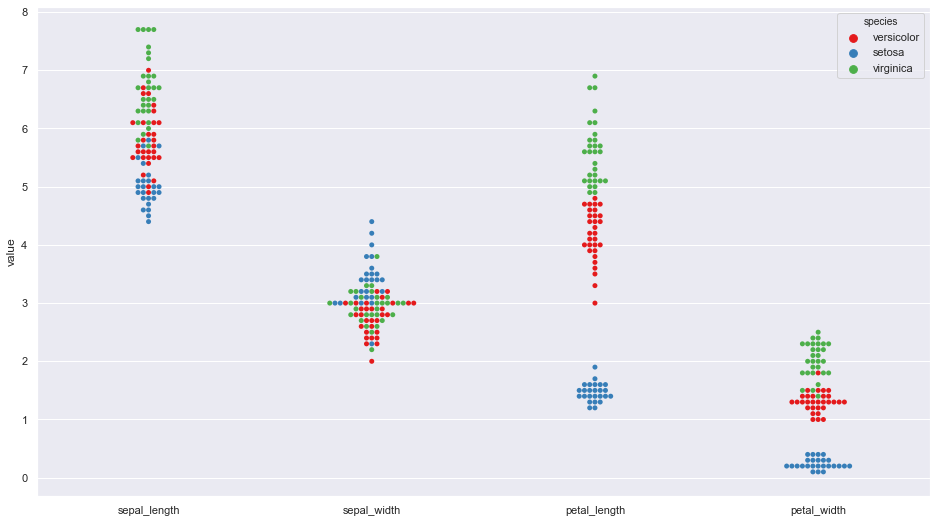

In [309]:
sns.swarmplot(data=variable_values,
              y='value',
              x='variable',
              hue='species',
              palette='Set1'
             )
plt.xlabel('');

Create 4 subplots (2 rows x 2 columns) of scatterplots
1. sepal_length x sepal_width

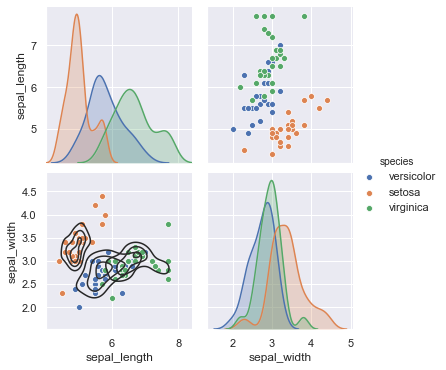

In [305]:
a = sns.pairplot(train,
                 hue='species',
                 x_vars = ['sepal_length', 'sepal_width'],
                 y_vars = ['sepal_length', 'sepal_width']
                )

a.map_lower(sns.kdeplot, levels=3, color=".2");

2. petal_length x petal_width

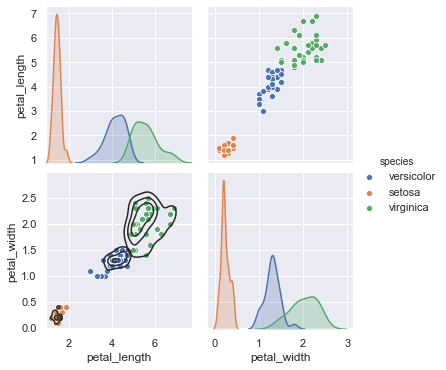

In [306]:
b = sns.pairplot(train,
                 hue='species',
                 x_vars = ['petal_length', 'petal_width'],
                 y_vars = ['petal_length', 'petal_width'],
                 kind='scatter'
                )

b.map_lower(sns.kdeplot, levels=3, color=".2");

3. sepal_area x petal_area

In [234]:
train['sepal_area'] = train.sepal_length \
                    * train.sepal_width
train['petal_area'] = train.petal_length \
                    * train.petal_width

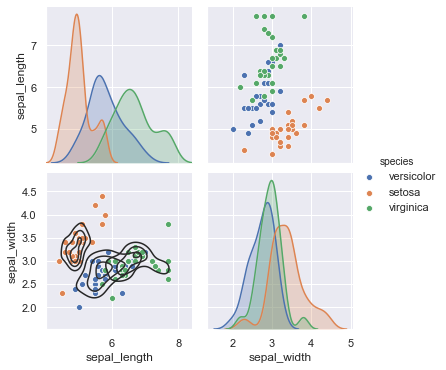

In [307]:
c = sns.pairplot(train,
                 hue='species',
                 x_vars = ['sepal_length', 'sepal_width'],
                 y_vars = ['sepal_length', 'sepal_width']
                )

c.map_lower(sns.kdeplot, levels=3, color=".2");

4. sepal_length x petal_length

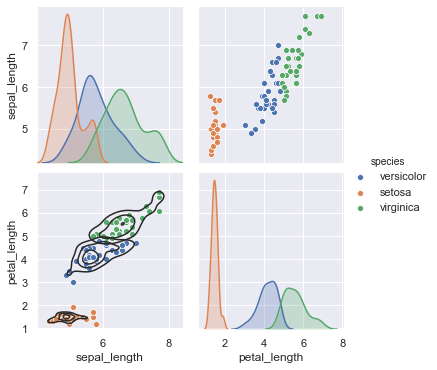

In [308]:
d = sns.pairplot(train,
                 hue='species',
                 x_vars = ['sepal_length', 'petal_length'],
                 y_vars = ['sepal_length', 'petal_length']
                )

d.map_lower(sns.kdeplot, levels=3, color=".2");

Create a heatmap of each variable layering correlation coefficient on top.

In [316]:
corr_train = train[['sepal_length',
                    'sepal_width',
                    'sepal_area',
                    'petal_length',
                    'petal_width',
                    'petal_area'
                     ]].corr()

In [325]:
# Creates a boolean mask of the upper right corner
corr_mask = np.triu( 
    np.ones(corr_train.shape)).astype(np.bool) # Turn 1 into Trues

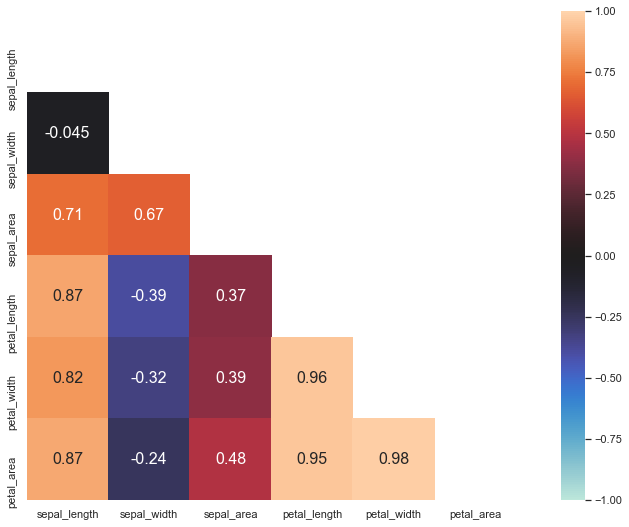

In [324]:
with sns.axes_style("white"):
    sns.heatmap(corr_train,
            mask=corr_mask,
            annot = True,
            vmax = 1,
            vmin = -1,
            center = 0,
            square = True,
            cmap = 'icefire');

Create a scatter matrix visualizing the interaction of each variable

In [244]:
# Columns to filter for.
scatter_data = ['sepal_length',
                'sepal_width',
                'petal_length',
                'petal_width',
                'sepal_area',
                'petal_area'
               ]

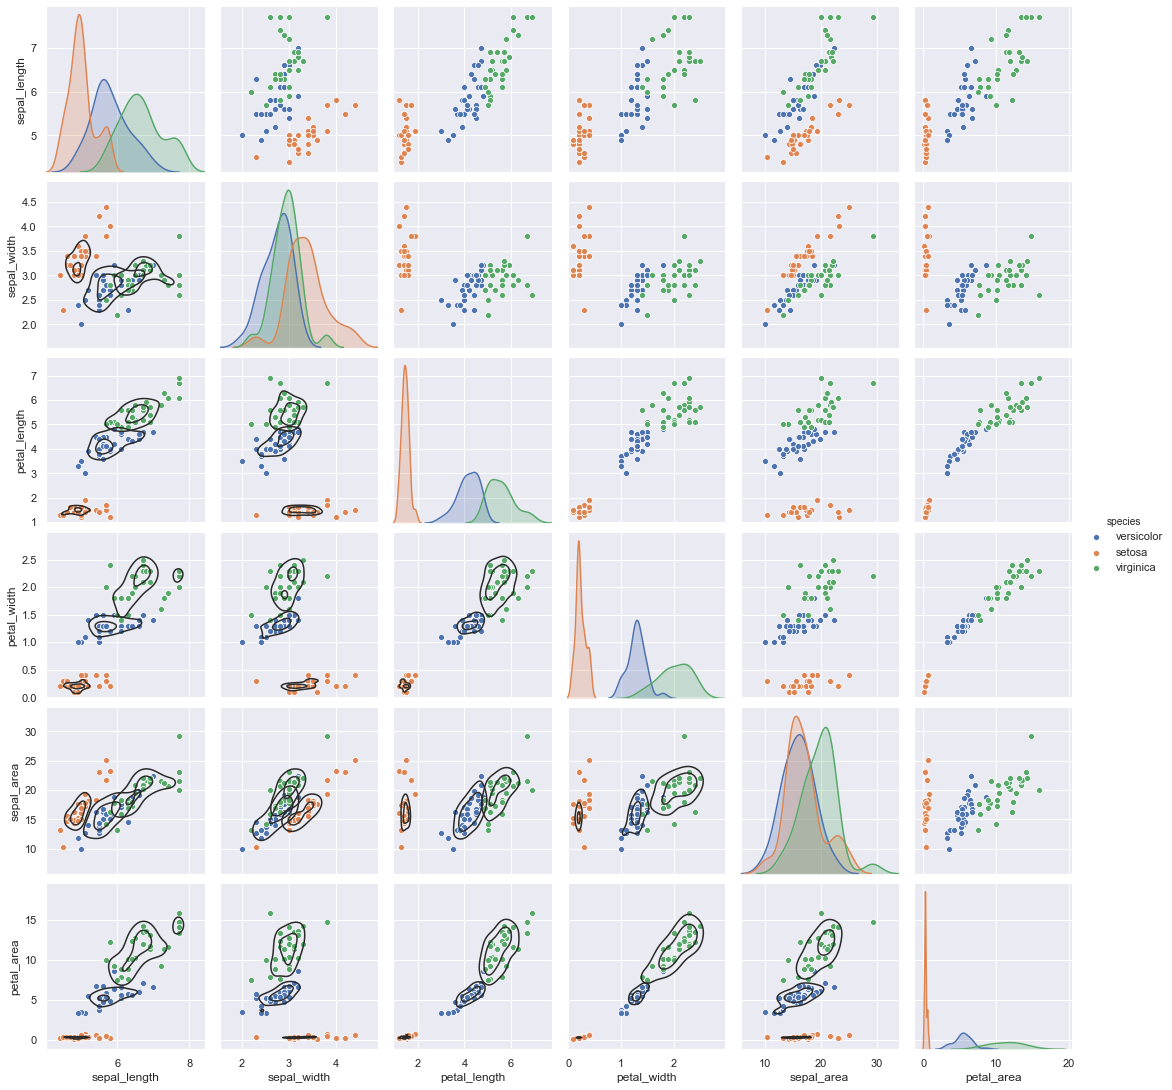

In [301]:
p = sns.pairplot(data=train,
             x_vars=scatter_data,
             y_vars=scatter_data,
             hue='species',
            );


p.map_lower(sns.kdeplot, levels=2, color=".2");

Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

In [246]:
from scipy import stats

##### Step 1. Establish Hypotheses
1. Two-sample T-test Hypothesis
2. Set Confidence Interval
3. Calculate alpha.

\$H_{O}$ There is no difference in petal length in Iris-virginica v. Iris-versicolor.

\$H_{1}$ There is a difference in petal length in Iris-virginica v. Iris-versicolor.

In [251]:
confidence_interval = 0.95
alpha = 1 - confidence_interval

In [252]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

##### Step 2. Statistical Analysis

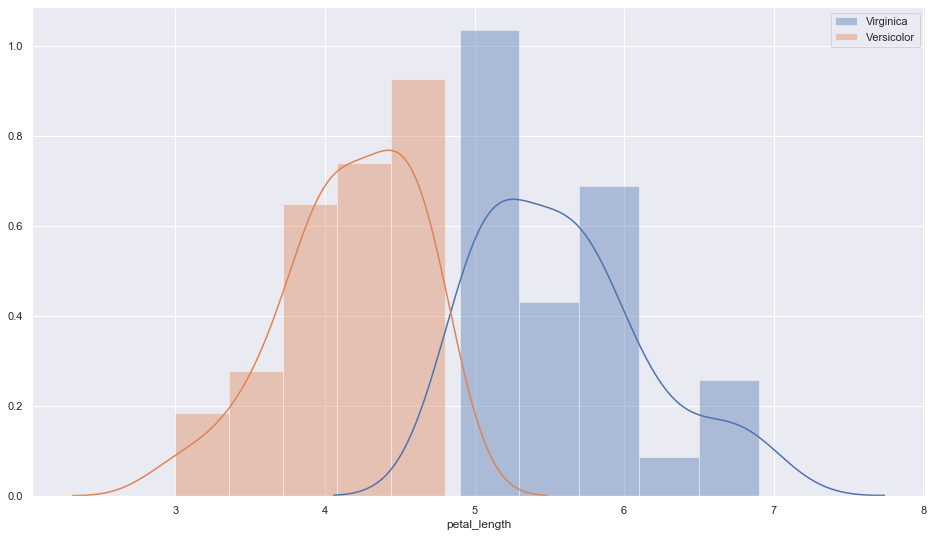

In [259]:
sns.distplot(virginica.petal_length, label='Virginica')
sns.distplot(versicolor.petal_length, label='Versicolor')
plt.legend();

In [273]:
virginica_stats = virginica.petal_length.describe()
virginica_stats.name = 'virginica_petal_length'

In [274]:
versicolor_stats = versicolor.petal_length.describe()
versicolor_stats.name = 'versicolor_petal_length'

In [277]:
virg_versi_stats = pd.concat(
    [virginica_stats,
     versicolor_stats],
    axis=1).T
virg_versi_stats

,count,mean,std,min,25%,50%,75%,max
virginica_petal_length,29.0,5.593103,0.557373,4.9,5.100,5.6,5.8,6.9
versicolor_petal_length,30.0,4.170000,0.451931,3.0,3.925,4.2,4.5,4.8


##### Determine the appropriate hypothesis

In [283]:
t, p = stats.ttest_ind(virginica.petal_length, \
                       versicolor.petal_length)

print(("Two-Sample T-Test: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(t, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha).\nThere is a difference' \
          ' in petal length in Iris-virginica v. Iris-versicolor.')
else:
    print('Fail to reject HO. There is no difference' \
          ' in petal length in Iris-virginica v. Iris-versicolor.')

Two-Sample T-Test: 10.79
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha).
There is a difference in petal length in Iris-virginica v. Iris-versicolor.


In [53]:
df_titanic = acquire.get_titanic_data()
df_titanic = prepare.prep_titanic(df_titanic)

In [54]:
df_titanic.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_Queenstown,embark_Southampton
0,0,male,0.271174,1,0,0.014151,Third,Southampton,0,0,1
1,1,female,0.472229,1,0,0.139136,First,Cherbourg,0,0,0
2,1,female,0.321438,0,0,0.015469,Third,Southampton,1,0,1
3,1,female,0.434531,1,0,0.103644,First,Southampton,0,0,1
4,0,male,0.434531,0,0,0.015713,Third,Southampton,1,0,1


In [55]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            889 non-null    int64  
 1   sex                 889 non-null    object 
 2   age                 889 non-null    float64
 3   sibsp               889 non-null    int64  
 4   parch               889 non-null    int64  
 5   fare                889 non-null    float64
 6   class               889 non-null    object 
 7   embark_town         889 non-null    object 
 8   alone               889 non-null    int64  
 9   embark_Queenstown   889 non-null    uint8  
 10  embark_Southampton  889 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(2)
memory usage: 71.2+ KB


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train, test = train_test_split(df_titanic,
                               test_size=.3,
                               stratify=df_titanic.survived)

train, validate = train_test_split(train,
                               test_size=.2,
                               stratify=train.survived)

In [58]:
train.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_Queenstown,embark_Southampton
616,0,male,0.421965,1,1,0.028107,Third,Southampton,0,0,1
694,0,male,0.748681,0,0,0.051822,First,Southampton,1,0,1
450,0,male,0.447097,1,2,0.054164,Second,Southampton,0,0,1
706,1,female,0.560191,0,0,0.026350,Second,Southampton,1,0,1
820,1,female,0.648153,1,1,0.182500,First,Southampton,0,0,1


In [59]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,497.0,0.382294,0.486437,0.0,0.000000,0.000000,1.000000,1.0
age,497.0,0.364841,0.167397,0.0,0.271174,0.346569,0.434531,1.0
sibsp,497.0,0.521127,1.021965,0.0,0.000000,0.000000,1.000000,8.0
parch,497.0,0.390342,0.813537,0.0,0.000000,0.000000,0.000000,6.0
fare,497.0,0.068794,0.112380,0.0,0.015469,0.028213,0.061264,1.0
alone,497.0,0.585513,0.493130,0.0,0.000000,1.000000,1.000000,1.0
embark_Queenstown,497.0,0.084507,0.278427,0.0,0.000000,0.000000,0.000000,1.0
embark_Southampton,497.0,0.720322,0.449293,0.0,0.000000,1.000000,1.000000,1.0


Analysis

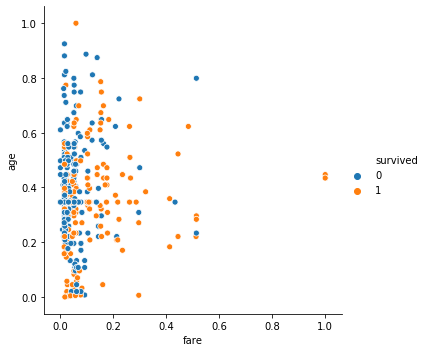

In [60]:
sns.relplot(data=train,
            x='fare',
            y='age',
            hue='survived'
           );

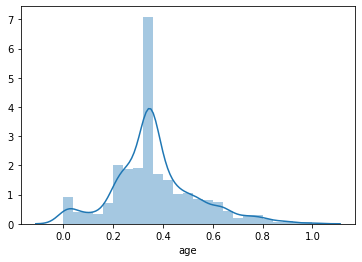

In [63]:
sns.distplot(train.age);